In [1]:
%pip install datasets pandas numpy matplotlib seaborn scikit-learn



Note: you may need to restart the kernel to use updated packages.


In [2]:
# Import libraries for EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset
from collections import Counter
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', None)


# Set style for better plots
plt.style.use('default')
sns.set_palette("husl")

print("🔍 HuggingFace Dataset EDA: gretelai/synthetic_text_to_sql")
print("=" * 60)
print("📋 This notebook explores the original HuggingFace dataset structure")
print("🎯 Focus: Understanding data distribution, SQL complexity, and domain coverage")
print("=" * 60)


/home/zineng/workspace/ml_dev/nlp_ml/sql_finetuning/sql_evaluation_library/sql_fine_tuning/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


🔍 HuggingFace Dataset EDA: gretelai/synthetic_text_to_sql
📋 This notebook explores the original HuggingFace dataset structure
🎯 Focus: Understanding data distribution, SQL complexity, and domain coverage


In [3]:
# Step 1: Load the HuggingFace Dataset
print("📥 STEP 1: Loading HuggingFace Dataset")
print("=" * 50)

# Load the dataset directly from HuggingFace
print("🔍 Loading 'gretelai/synthetic_text_to_sql' dataset...")
try:
    # Load full training dataset
    dataset = load_dataset('gretelai/synthetic_text_to_sql')
    print(dataset.keys())
    print("📊 Available splits and sizes:")
    for split in dataset.keys():
        print(f"🔹 {split}: {len(dataset[split])} examples")

    if "train" in dataset:
        train_data = dataset["test"]
        print(f"\n✅ Loaded 'train' split with {len(train_data)} examples")
    else:
        print("\n⚠️ 'train' split not found in this dataset")
        exit(1)
    
    print(f"🏷️ Features: {list(dataset['train'].features.keys())}")
    
    # Convert to pandas DataFrame for easier analysis
    df = train_data.to_pandas()
    print(f"📊 DataFrame shape: {df.shape}")
    print(f"💾 Memory usage: {df.memory_usage(deep=True).sum() / (1024*1024):.2f} MB")
    
    # Display first few rows
    print(f"\n🔍 Dataset Structure (First 3 Records):")
    print("=" * 40)
    for i in range(min(3, len(df))):
        print(f"\n--- Record {i+1} ---")
        for col in df.columns:
            value = str(df.iloc[i][col])
            if len(value) > 100:
                print(f"{col}: {value[:100]}...")
            else:
                print(f"{col}: {value}")
    
except Exception as e:
    print(f"❌ Failed to load dataset: {e}")
    df = None


📥 STEP 1: Loading HuggingFace Dataset
🔍 Loading 'gretelai/synthetic_text_to_sql' dataset...
dict_keys(['train', 'test'])
📊 Available splits and sizes:
🔹 train: 100000 examples
🔹 test: 5851 examples

✅ Loaded 'train' split with 5851 examples
🏷️ Features: ['id', 'domain', 'domain_description', 'sql_complexity', 'sql_complexity_description', 'sql_task_type', 'sql_task_type_description', 'sql_prompt', 'sql_context', 'sql', 'sql_explanation']
📊 DataFrame shape: (5851, 11)
💾 Memory usage: 8.17 MB

🔍 Dataset Structure (First 3 Records):

--- Record 1 ---
id: 1
domain: artificial intelligence
domain_description: AI data on algorithmic fairness, AI safety, explainable AI, and creative AI applications.
sql_complexity: basic SQL
sql_complexity_description: basic SQL with a simple select statement
sql_task_type: analytics and reporting
sql_task_type_description: generating reports, dashboards, and analytical insights
sql_prompt: What is the average explainability score of creative AI applications 

In [4]:
# Step 2: Basic Dataset Statistics and Data Quality
if df is not None:
    print("\n📊 STEP 2: Basic Dataset Statistics")
    print("=" * 50)
    
    # Basic info
    print(f"Dataset Shape: {df.shape}")
    print(f"Columns: {list(df.columns)}")
    
    # Data types
    print(f"\n🏷️ Data Types:")
    for col, dtype in df.dtypes.items():
        print(f"  {col}: {dtype}")
    
    # Missing values analysis
    print(f"\n🔍 Missing Values Analysis:")
    missing_info = df.isnull().sum()
    total_rows = len(df)
    
    print(f"{'Column':<25} {'Missing Count':<15} {'Percentage':<12}")
    print("-" * 50)
    for col, missing_count in missing_info.items():
        percentage = (missing_count / total_rows) * 100
        status = "✅" if missing_count == 0 else "⚠️"
        print(f"{col:<25} {missing_count:<15} {percentage:<6.2f}% {status}")
    
    # Unique values per column
    print(f"\n🎯 Unique Values per Column:")
    print(f"{'Column':<25} {'Unique Count':<15} {'Sample Values'}")
    print("-" * 70)
    for col in df.columns:
        unique_count = df[col].nunique()
        sample_values = df[col].value_counts().head(3).index.tolist()
        sample_str = ", ".join([str(v)[:30] for v in sample_values])
        print(f"{col:<25} {unique_count:<15} {sample_str}")
    
    # Text length statistics for key fields
    print(f"\n📏 Text Length Statistics:")
    text_fields = ['sql_prompt', 'sql_context', 'sql', 'sql_explanation']
    for field in text_fields:
        if field in df.columns:
            lengths = df[field].astype(str).str.len()
            print(f"\n{field}:")
            print(f"  Mean: {lengths.mean():.1f} characters")
            print(f"  Median: {lengths.median():.1f} characters") 
            print(f"  Min: {lengths.min()} characters")
            print(f"  Max: {lengths.max()} characters")
            print(f"  Std: {lengths.std():.1f} characters")
    
else:
    print("❌ Cannot perform basic statistics - dataset not loaded")



📊 STEP 2: Basic Dataset Statistics
Dataset Shape: (5851, 11)
Columns: ['id', 'domain', 'domain_description', 'sql_complexity', 'sql_complexity_description', 'sql_task_type', 'sql_task_type_description', 'sql_prompt', 'sql_context', 'sql', 'sql_explanation']

🏷️ Data Types:
  id: int32
  domain: object
  domain_description: object
  sql_complexity: object
  sql_complexity_description: object
  sql_task_type: object
  sql_task_type_description: object
  sql_prompt: object
  sql_context: object
  sql: object
  sql_explanation: object

🔍 Missing Values Analysis:
Column                    Missing Count   Percentage  
--------------------------------------------------
id                        0               0.00  % ✅
domain                    0               0.00  % ✅
domain_description        0               0.00  % ✅
sql_complexity            0               0.00  % ✅
sql_complexity_description 0               0.00  % ✅
sql_task_type             0               0.00  % ✅
sql_task_type_d

In [5]:
print(df.query("domain in ['finance', 'financial services']")['sql_task_type'].value_counts())

print(df.query("domain in ['finance', 'financial services']")['sql_complexity'].value_counts())

sql_task_type
analytics and reporting    130
data manipulation            9
data retrieval               3
Name: count, dtype: int64
sql_complexity
basic SQL           61
single join         33
aggregation         22
window functions     9
multiple_joins       8
subqueries           7
CTEs                 2
Name: count, dtype: int64


In [11]:
df.query("domain in ['finance', 'financial services']") \
.groupby('sql_complexity', group_keys=False).apply(lambda x: x.sample(n=min(3, len(x)), random_state=42)) \
.drop(columns=['domain_description', 'sql_complexity_description', 'sql_task_type_description', 'sql_explanation'])  \
.reset_index(drop=True)

,id,domain,sql_complexity,sql_task_type,sql_prompt,sql_context,sql
0,3235,finance,CTEs,data manipulation,"Update the financial wellbeing score of clients in Singapore to 1 point higher than their current score, if their score is currently below 7.","CREATE TABLE financial_wellbeing_sg (client_id INT, financial_wellbeing_score INT, country VARCHAR(50)); INSERT INTO financial_wellbeing_sg (client_id, financial_wellbeing_score, country) VALUES (1, 7, 'Singapore'), (2, 3, 'Singapore'), (3, 6, 'Singapore');",WITH updated_scores AS (UPDATE financial_wellbeing_sg SET financial_wellbeing_score = financial_wellbeing_score + 1 WHERE country = 'Singapore' AND financial_wellbeing_score < 7) SELECT * FROM updated_scores;
1,2876,finance,CTEs,data manipulation,Update the financial wellbeing score of clients in Indonesia to 1 point higher than their current score.,"CREATE TABLE financial_wellbeing_id (client_id INT, financial_wellbeing_score INT, country VARCHAR(50)); INSERT INTO financial_wellbeing_id (client_id, financial_wellbeing_score, country) VALUES (1, 7, 'Indonesia'), (2, 3, 'Indonesia'), (3, 6, 'Indonesia');",WITH updated_scores AS (UPDATE financial_wellbeing_id SET financial_wellbeing_score = financial_wellbeing_score + 1 WHERE country = 'Indonesia') SELECT * FROM updated_scores;
2,112,financial services,aggregation,analytics and reporting,What is the average account balance for customers in each investment strategy?,"CREATE TABLE customers (customer_id INT, name VARCHAR(50), age INT, region VARCHAR(20), account_balance DECIMAL(10, 2), strategy_name VARCHAR(50)); INSERT INTO customers (customer_id, name, age, region, account_balance, strategy_name) VALUES (1, 'John Doe', 35, 'Southeast', 15000.00, 'Equity'), (2, 'Jane Smith', 45, 'Northeast', 20000.00, 'Bond'), (3, 'Mike Johnson', 50, 'Southeast', 25000.00, 'Equity'), (4, 'Alice Davis', 25, 'Midwest', 10000.00, 'Bond'), (5, 'Bob Brown', 60, 'Northwest', 30000.00, 'Real Estate');","SELECT strategy_name, AVG(account_balance) FROM customers GROUP BY strategy_name;"
3,3217,financial services,aggregation,analytics and reporting,What is the average assets value for customers in each region?,"CREATE TABLE customers (customer_id INT, name TEXT, region TEXT, assets_value DECIMAL); INSERT INTO customers (customer_id, name, region, assets_value) VALUES (1, 'John Doe', 'New York', 50000.00), (2, 'Jane Smith', 'California', 75000.00), (3, 'Bob Johnson', 'New York', 60000.00);","SELECT region, AVG(assets_value) FROM customers GROUP BY region;"
4,2191,financial services,aggregation,analytics and reporting,Show the top 5 customers by total transaction amount in Australia.,"CREATE TABLE transactions (customer_id INT, transaction_amount DECIMAL(10,2), country VARCHAR(50)); INSERT INTO transactions (customer_id, transaction_amount, country) VALUES (1, 120.50, 'Australia'), (2, 75.30, 'Australia'), (3, 150.00, 'Australia'), (4, 50.00, 'Australia'), (5, 250.00, 'Australia'), (6, 100.00, 'Australia'), (7, 300.00, 'Australia'), (8, 200.00, 'Australia'), (9, 400.00, 'Australia'), (10, 500.00, 'Australia');","SELECT customer_id, SUM(transaction_amount) AS total_amount FROM transactions WHERE country = 'Australia' GROUP BY customer_id ORDER BY total_amount DESC LIMIT 5;"
5,42,finance,basic SQL,analytics and reporting,What are the names and total transactions of all Shariah-compliant financial institutions from the finance database?,"CREATE TABLE shariah_compliant_institutions (name VARCHAR(255), total_transactions INT); INSERT INTO shariah_compliant_institutions (name, total_transactions) VALUES ('Institution A', 3000), ('Institution B', 5000);","SELECT name, SUM(total_transactions) FROM shariah_compliant_institutions;"
6,376,finance,basic SQL,analytics and reporting,What is the average loan amount for clients in Turkey and Iran?,"CREATE TABLE loans (id INT, client_name VARCHAR(50), country VARCHAR(50), amount DECIMAL(10,2), date DATE); INSERT INTO loans (id, client_name, country, amount, date) VALUES (1, '


🏷️ STEP 3: Categorical Fields Distribution

🔍 Domain Analysis:
  Unique values: 100
  Most common values:
     1. rural development: 86 (1.5%)
     2. sports: 85 (1.5%)
     3. water resources: 85 (1.5%)
     4. oceanography: 83 (1.4%)
     5. public transportation: 78 (1.3%)
     6. arts and culture: 78 (1.3%)
     7. ethical fashion: 78 (1.3%)
     8. public health: 77 (1.3%)
     9. trade unions: 77 (1.3%)
    10. cybersecurity: 76 (1.3%)
    11. telecommunications: 76 (1.3%)
    12. hospitality: 74 (1.3%)
    13. artificial intelligence: 73 (1.2%)
    14. nonprofit operations: 73 (1.2%)
    15. transportation: 73 (1.2%)
    16. finance: 72 (1.2%)
    17. space: 72 (1.2%)
    18. real estate: 71 (1.2%)
    19. blockchain: 71 (1.2%)
    20. financial services: 70 (1.2%)
    21. restaurant operations: 70 (1.2%)
    22. humanitarian aid: 70 (1.2%)
    23. sports entertainment: 69 (1.2%)
    24. beauty industry: 68 (1.2%)
    25. gaming technology: 68 (1.2%)
    26. waste management: 6

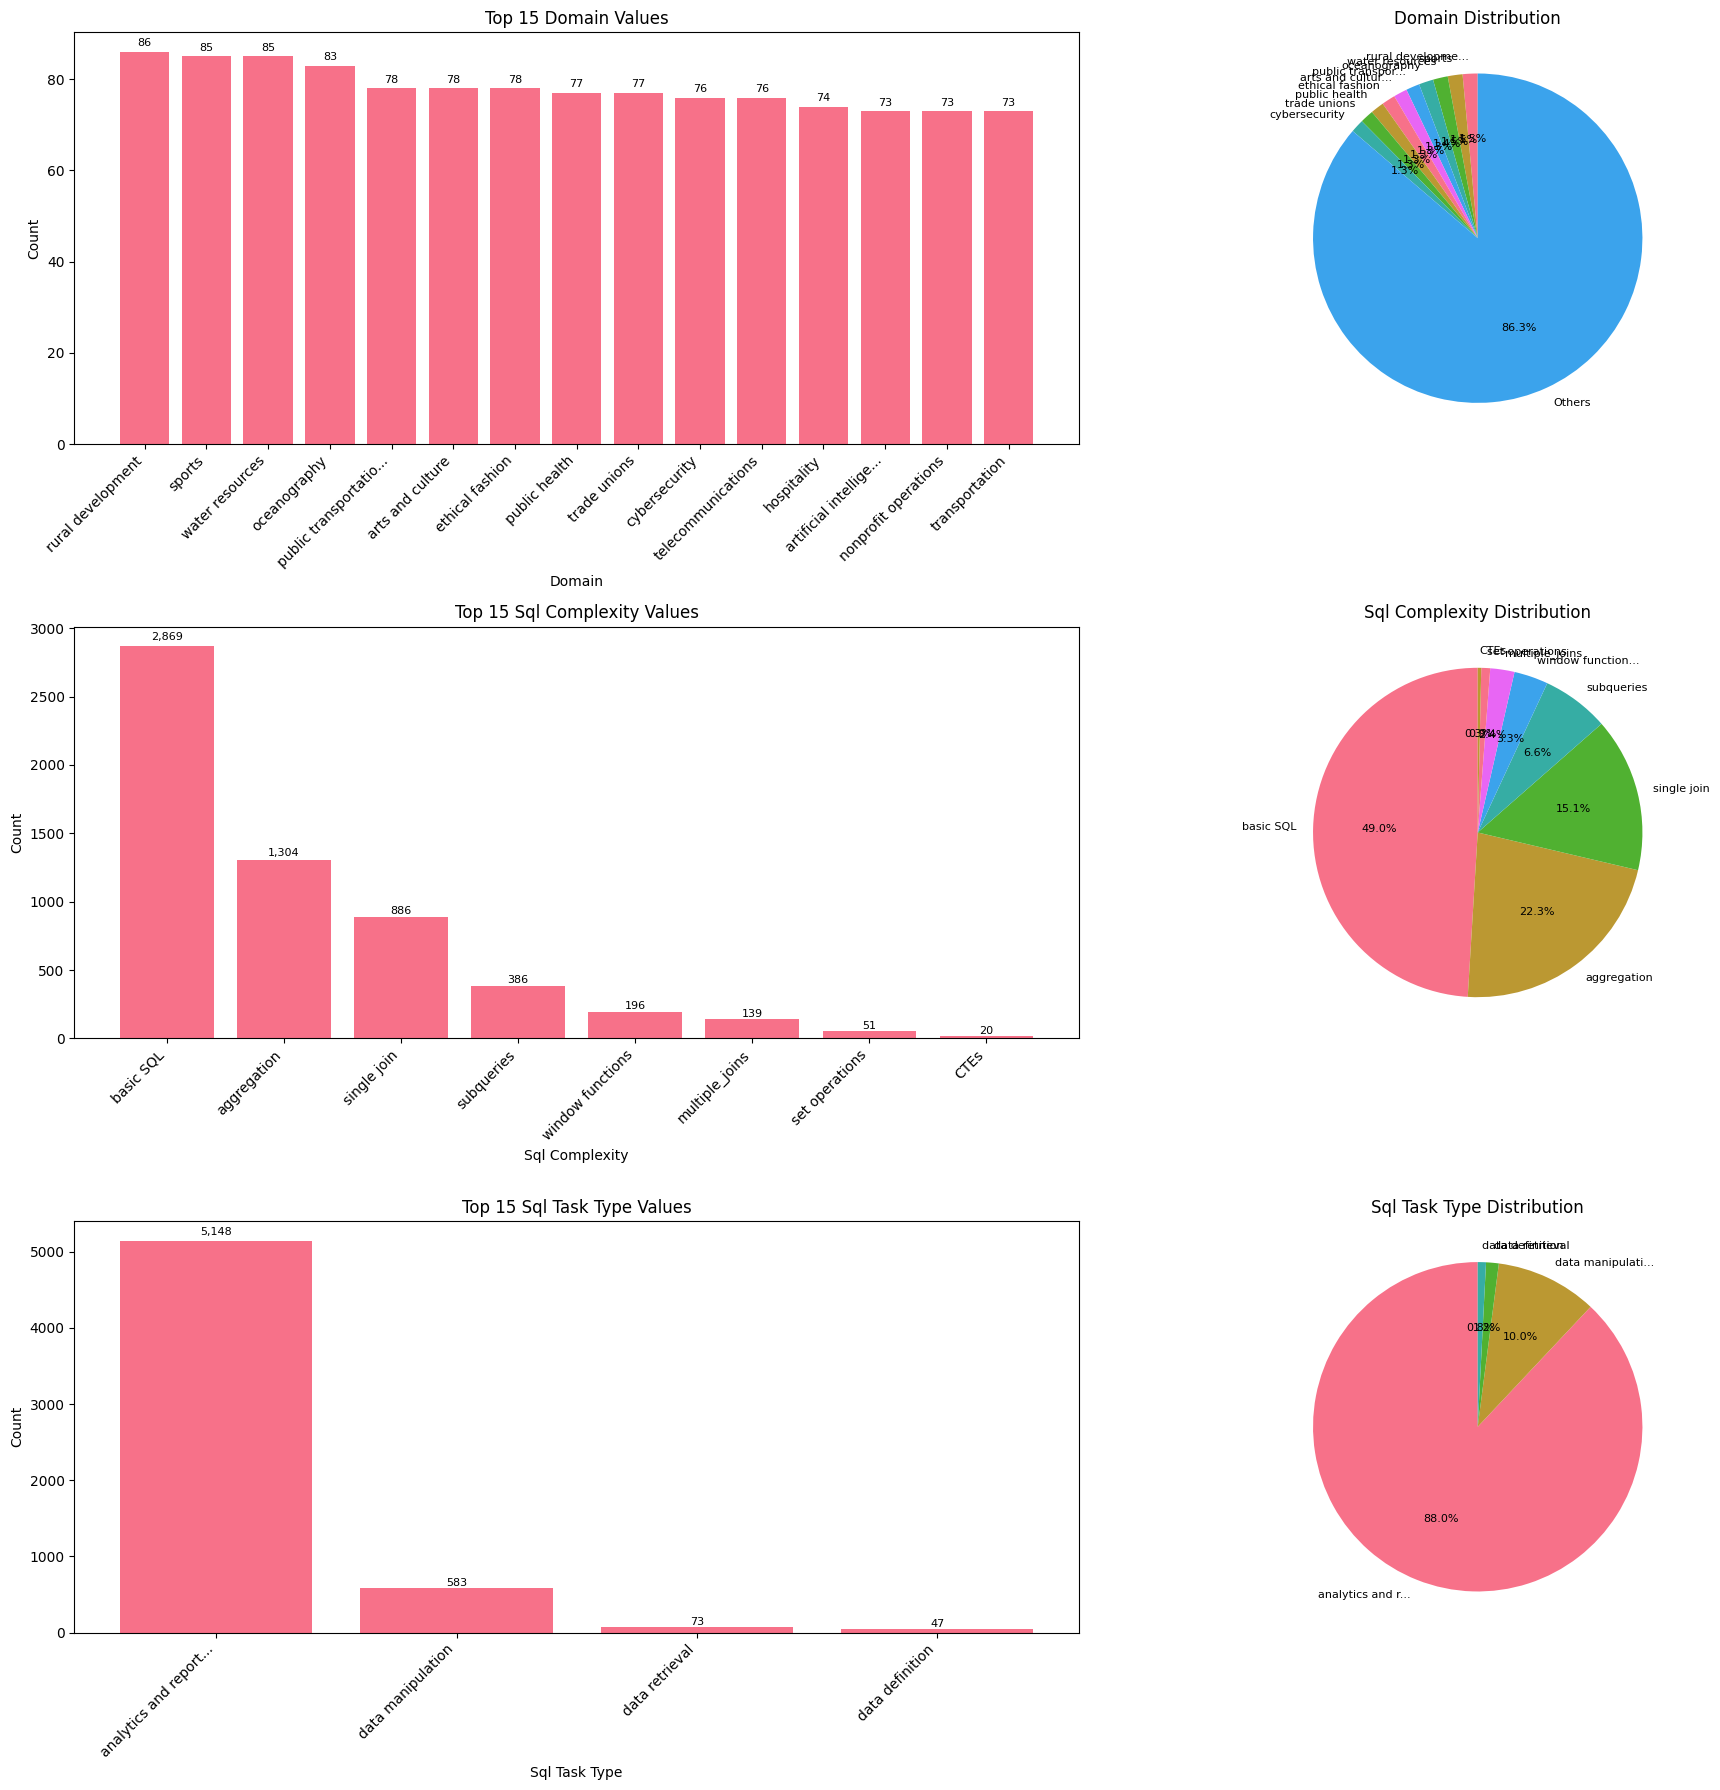


📊 Cross-tabulation: SQL Complexity vs Task Type
sql_task_type     analytics and reporting  data definition  data manipulation  \
sql_complexity                                                                  
CTEs                                    1                0                 19   
aggregation                          1301                3                  0   
basic SQL                            2247               42                510   
multiple_joins                        139                0                  0   
set operations                         50                0                  1   
single join                           880                2                  4   
subqueries                            336                0                 48   
window functions                      194                0                  1   
All                                  5148               47                583   

sql_task_type     data retrieval   All  
sql_complexity    

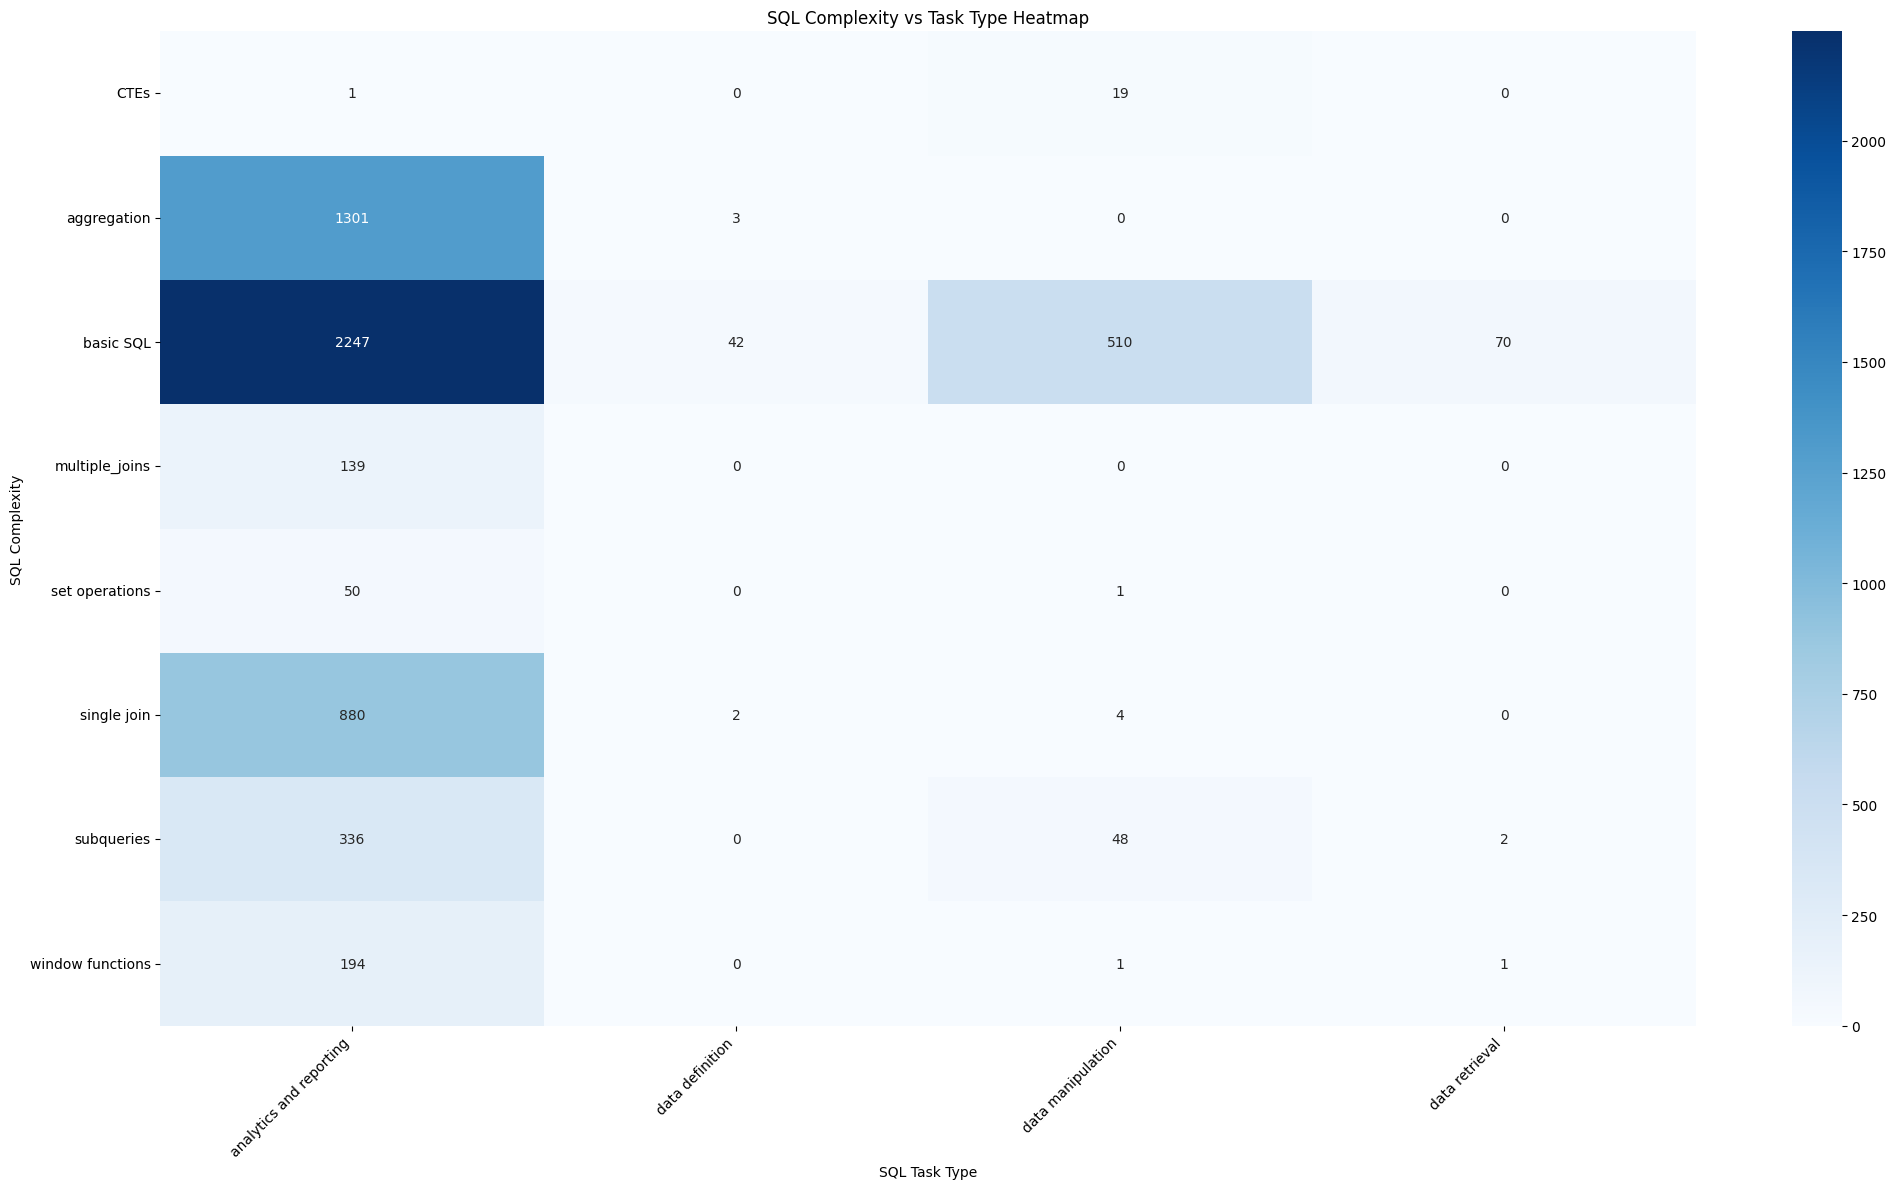

In [ ]:
# Step 3: Categorical Fields Distribution Analysis
if df is not None:
    print("\n🏷️ STEP 3: Categorical Fields Distribution")
    print("=" * 50)
    
    # Define categorical fields to analyze
    categorical_fields = ['domain', 'sql_complexity', 'sql_task_type']
    
    # Create subplots for distributions
    fig, axes = plt.subplots(len(categorical_fields), 2, figsize=(20, 6*len(categorical_fields)))
    if len(categorical_fields) == 1:
        axes = axes.reshape(1, -1)
    
    for idx, field in enumerate(categorical_fields):
        if field in df.columns:
            print(f"\n🔍 {field.replace('_', ' ').title()} Analysis:")
            
            # Get value counts
            value_counts = df[field].value_counts()
            print(f"  Unique values: {len(value_counts)}")
            print(f"  Most common values:")
            
            default_count = 10
            if field == 'domain':
                default_count = 50
            for i, (val, count) in enumerate(value_counts.head(default_count).items(), 1):
                percentage = (count / len(df)) * 100
                print(f"    {i:2d}. {val}: {count:,} ({percentage:.1f}%)")
            
            # Bar plot
            ax1 = axes[idx, 0]
            top_values = value_counts.head(15)
            bars = ax1.bar(range(len(top_values)), top_values.values)
            ax1.set_title(f'Top 15 {field.replace("_", " ").title()} Values')
            ax1.set_xlabel(f'{field.replace("_", " ").title()}')
            ax1.set_ylabel('Count')
            ax1.set_xticks(range(len(top_values)))
            ax1.set_xticklabels([str(v)[:20] + '...' if len(str(v)) > 20 else str(v) 
                                for v in top_values.index], rotation=45, ha='right')
            
            # Add value labels on bars
            for bar, value in zip(bars, top_values.values):
                height = bar.get_height()
                ax1.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
                        f'{value:,}', ha='center', va='bottom', fontsize=8)
            
            # Pie chart for top categories
            ax2 = axes[idx, 1]
            
            # Group smaller categories into "Others"
            top_10 = value_counts.head(10)
            others_count = value_counts.iloc[10:].sum() if len(value_counts) > 10 else 0
            
            if others_count > 0:
                pie_data = list(top_10.values) + [others_count]
                pie_labels = list(top_10.index) + ['Others']
            else:
                pie_data = top_10.values
                pie_labels = top_10.index
                
            # Truncate labels for better display
            pie_labels = [str(label)[:15] + '...' if len(str(label)) > 15 else str(label) 
                         for label in pie_labels]
            
            wedges, texts, autotexts = ax2.pie(pie_data, labels=pie_labels, autopct='%1.1f%%', 
                                              startangle=90, textprops={'fontsize': 8})
            ax2.set_title(f'{field.replace("_", " ").title()} Distribution')
            
        else:
            print(f"⚠️ Field '{field}' not found in dataset")
            # Hide unused subplots
            axes[idx, 0].set_visible(False)
            axes[idx, 1].set_visible(False)
    
    plt.tight_layout()
    plt.show()
    
    # Cross-tabulation analysis
    if all(field in df.columns for field in ['sql_complexity', 'sql_task_type']):
        print(f"\n📊 Cross-tabulation: SQL Complexity vs Task Type")
        crosstab = pd.crosstab(df['sql_complexity'], df['sql_task_type'], margins=True)
        print(crosstab)
        
        # Visualize cross-tabulation
        plt.figure(figsize=(21, 12))
        
        # Create heatmap (excluding margins)
        crosstab_no_margins = pd.crosstab(df['sql_complexity'], df['sql_task_type'])
        sns.heatmap(crosstab_no_margins, annot=True, fmt='d', cmap='Blues')
        plt.title('SQL Complexity vs Task Type Heatmap')
        plt.xlabel('SQL Task Type')
        plt.ylabel('SQL Complexity')
        plt.xticks(rotation=45, ha='right')
        plt.yticks(rotation=0)
        plt.tight_layout()
        plt.show()
        
else:
    print("❌ Cannot perform categorical analysis - dataset not loaded")



🔗 STEP 4: SQL Query Analysis - Complex JOINs
🔍 Analyzing JOIN patterns in SQL queries...

📊 JOIN Query Statistics:
  Total queries: 5,851
  Queries with JOINs: 1,118 (19.1%)
  Queries without JOINs: 4,733 (80.9%)

🔢 JOIN Count Distribution:
  1 JOIN(s): 537 queries (9.2%)
  2 JOIN(s): 504 queries (8.6%)
  3 JOIN(s): 12 queries (0.2%)
  4 JOIN(s): 62 queries (1.1%)
  6 JOIN(s): 2 queries (0.0%)
  8 JOIN(s): 1 queries (0.0%)

🎯 SQL Complexity Score Statistics:
  Mean: 2.8
  Median: 2.0
  Min: 0
  Max: 34
  Std: 2.9

🏆 High Complexity Queries (score ≥ 5): 1,238 (21.2%)


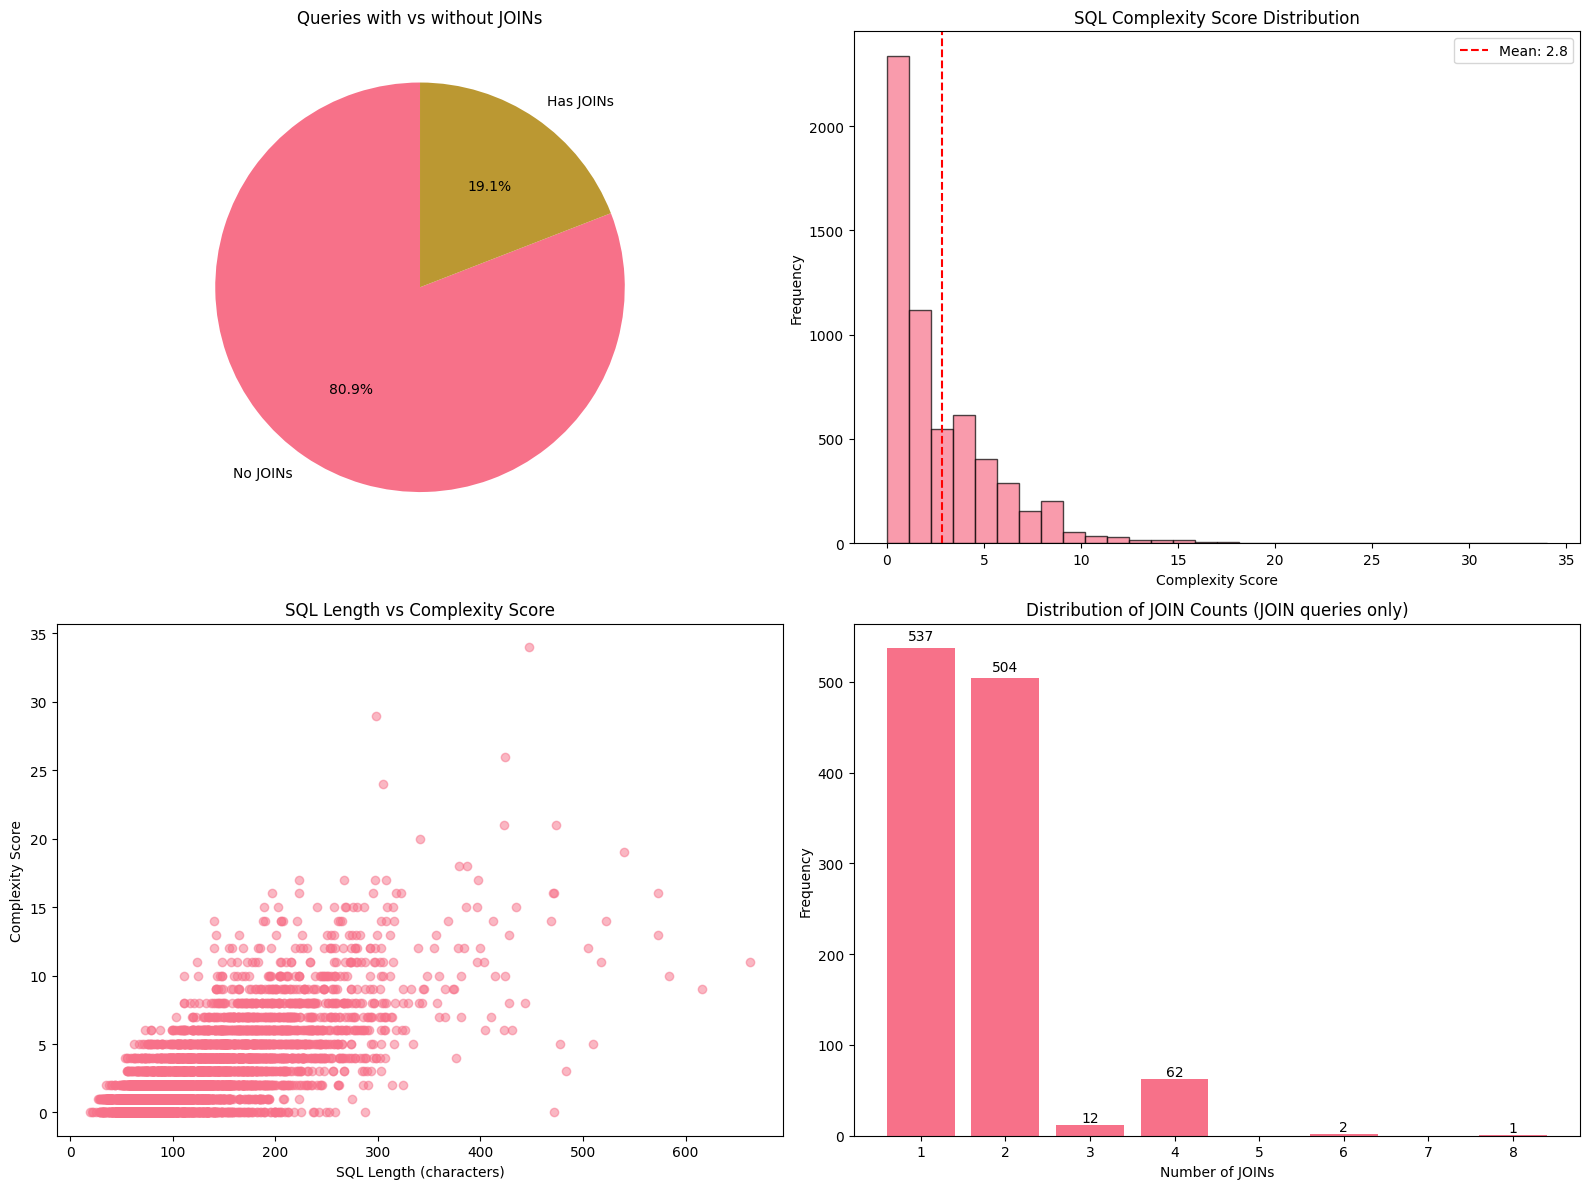

In [6]:
# Step 4: SQL Query Analysis - Finding Complex JOIN Queries
if df is not None:
    print("\n🔗 STEP 4: SQL Query Analysis - Complex JOINs")
    print("=" * 50)
    
    # Function to analyze SQL complexity
    def analyze_sql_complexity(sql_query):
        """Analyze SQL query complexity based on various features."""
        if not sql_query or pd.isna(sql_query):
            return 0
        
        sql_upper = str(sql_query).upper()
        complexity_score = 0
        
        # Count JOIN types (weight: 2 points each)
        join_types = ['INNER JOIN', 'LEFT JOIN', 'RIGHT JOIN', 'FULL JOIN', 'OUTER JOIN', 'JOIN']
        join_count = sum(sql_upper.count(join_type) for join_type in join_types)
        complexity_score += join_count * 2
        
        # Count subqueries (weight: 3 points each)
        subquery_count = sql_upper.count('SELECT') - 1  # Subtract main query
        complexity_score += max(0, subquery_count) * 3
        
        # Count advanced functions (weight: 1 point each)
        advanced_functions = ['CASE', 'COALESCE', 'WINDOW', 'OVER', 'PARTITION', 'RANK', 'ROW_NUMBER']
        for func in advanced_functions:
            complexity_score += sql_upper.count(func)
        
        # Count aggregations (weight: 1 point each)
        aggregations = ['GROUP BY', 'HAVING', 'SUM', 'COUNT', 'AVG', 'MAX', 'MIN']
        for agg in aggregations:
            complexity_score += sql_upper.count(agg)
        
        return complexity_score
    
    # Analyze JOIN queries
    print("🔍 Analyzing JOIN patterns in SQL queries...")
    
    # Initialize analysis columns
    df['has_join'] = df['sql'].astype(str).str.upper().str.contains('JOIN')
    df['join_count'] = df['sql'].astype(str).str.upper().apply(
        lambda x: sum(x.count(join_type) for join_type in ['INNER JOIN', 'LEFT JOIN', 'RIGHT JOIN', 'FULL JOIN', 'OUTER JOIN', 'JOIN'])
    )
    df['complexity_score'] = df['sql'].apply(analyze_sql_complexity)
    df['has_subquery'] = df['sql'].astype(str).str.upper().apply(lambda x: x.count('SELECT') > 1)
    df['has_aggregation'] = df['sql'].astype(str).str.upper().str.contains('GROUP BY|HAVING')
    df['sql_length'] = df['sql'].astype(str).str.len()
    
    # Basic JOIN statistics
    total_queries = len(df)
    join_queries = df['has_join'].sum()
    
    print(f"\n📊 JOIN Query Statistics:")
    print(f"  Total queries: {total_queries:,}")
    print(f"  Queries with JOINs: {join_queries:,} ({join_queries/total_queries*100:.1f}%)")
    print(f"  Queries without JOINs: {total_queries - join_queries:,} ({(total_queries - join_queries)/total_queries*100:.1f}%)")
    
    # JOIN count distribution
    join_count_dist = df['join_count'].value_counts().sort_index()
    print(f"\n🔢 JOIN Count Distribution:")
    for join_count, frequency in join_count_dist.items():
        if join_count > 0:
            percentage = (frequency / total_queries) * 100
            print(f"  {join_count} JOIN(s): {frequency:,} queries ({percentage:.1f}%)")
    
    # Complexity score analysis
    complexity_stats = df['complexity_score'].describe()
    print(f"\n🎯 SQL Complexity Score Statistics:")
    print(f"  Mean: {complexity_stats['mean']:.1f}")
    print(f"  Median: {complexity_stats['50%']:.1f}")
    print(f"  Min: {complexity_stats['min']:.0f}")
    print(f"  Max: {complexity_stats['max']:.0f}")
    print(f"  Std: {complexity_stats['std']:.1f}")
    
    # High complexity queries (score >= 5)
    high_complexity = df[df['complexity_score'] >= 5]
    print(f"\n🏆 High Complexity Queries (score ≥ 5): {len(high_complexity):,} ({len(high_complexity)/total_queries*100:.1f}%)")
    
    # Visualizations
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # 1. JOIN vs No JOIN distribution
    join_counts = [total_queries - join_queries, join_queries]
    join_labels = ['No JOINs', 'Has JOINs']
    axes[0, 0].pie(join_counts, labels=join_labels, autopct='%1.1f%%', startangle=90)
    axes[0, 0].set_title('Queries with vs without JOINs')
    
    # 2. Complexity score distribution
    axes[0, 1].hist(df['complexity_score'], bins=30, alpha=0.7, edgecolor='black')
    axes[0, 1].set_title('SQL Complexity Score Distribution')
    axes[0, 1].set_xlabel('Complexity Score')
    axes[0, 1].set_ylabel('Frequency')
    axes[0, 1].axvline(complexity_stats['mean'], color='red', linestyle='--', label=f'Mean: {complexity_stats["mean"]:.1f}')
    axes[0, 1].legend()
    
    # 3. SQL length vs complexity score
    scatter = axes[1, 0].scatter(df['sql_length'], df['complexity_score'], alpha=0.5)
    axes[1, 0].set_title('SQL Length vs Complexity Score')
    axes[1, 0].set_xlabel('SQL Length (characters)')
    axes[1, 0].set_ylabel('Complexity Score')
    
    # 4. JOIN count distribution
    join_dist_plot = df[df['join_count'] > 0]['join_count'].value_counts().sort_index()
    axes[1, 1].bar(join_dist_plot.index, join_dist_plot.values)
    axes[1, 1].set_title('Distribution of JOIN Counts (JOIN queries only)')
    axes[1, 1].set_xlabel('Number of JOINs')
    axes[1, 1].set_ylabel('Frequency')
    
    # Add value labels on bars
    for i, v in enumerate(join_dist_plot.values):
        axes[1, 1].text(join_dist_plot.index[i], v + v*0.01, str(v), ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()
    
else:
    print("❌ Cannot perform SQL analysis - dataset not loaded")



🎯 STEP 5: Domain Analysis & Complex Query Examples
🔍 Analyzing 1,118 queries with JOINs across domains...

📊 Top 15 Domains with JOIN Queries:
Rank  Domain                    JOIN Queries    % of Domain  % of All JOINs
----------------------------------------------------------------------
1     financial services        32              45.7       % 2.9%
2     arts and culture          27              34.6       % 2.4%
3     retail                    27              47.4       % 2.4%
4     ocean shipping            25              51.0       % 2.2%
5     legal services            25              39.7       % 2.2%
6     startups                  24              46.2       % 2.1%
7     mental health             21              36.8       % 1.9%
8     manufacturing             21              33.3       % 1.9%
9     logistics                 20              31.7       % 1.8%
10    public transportation     20              25.6       % 1.8%
11    social media              19              3

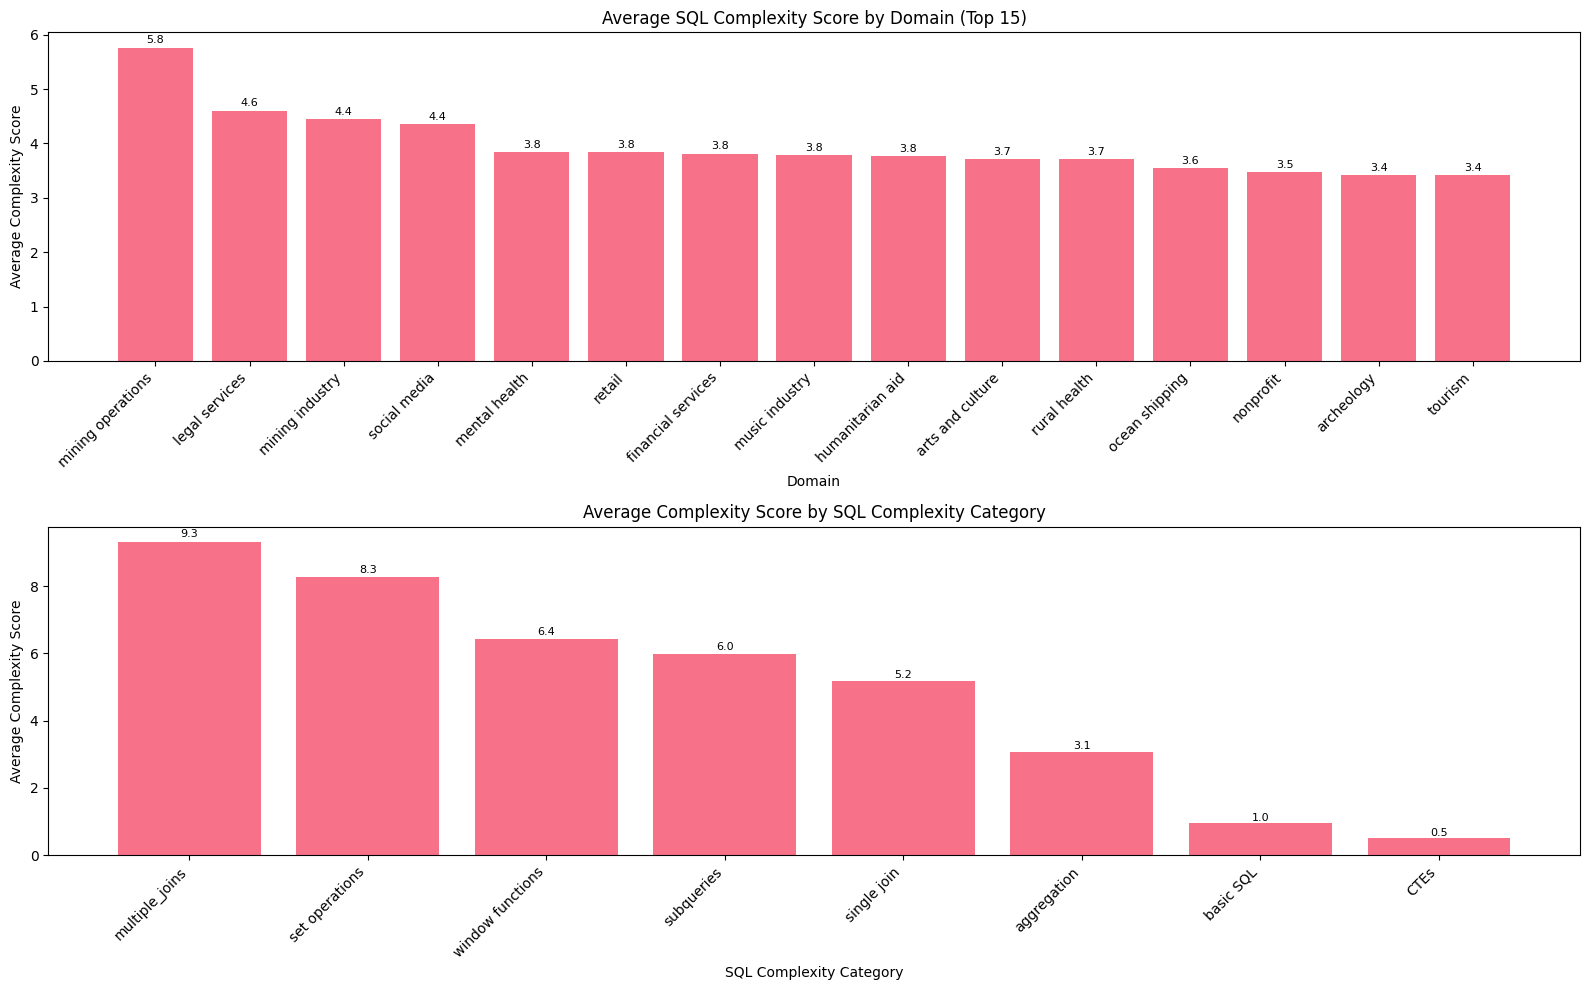

In [7]:
# Step 5: Domain Analysis and Complex Query Selection
if df is not None:
    print("\n🎯 STEP 5: Domain Analysis & Complex Query Examples")
    print("=" * 50)
    
    # Domain analysis for JOIN queries
    join_df = df[df['has_join']]
    
    if len(join_df) > 0:
        print(f"🔍 Analyzing {len(join_df):,} queries with JOINs across domains...")
        
        # Domain distribution for JOIN queries
        join_domain_dist = join_df['domain'].value_counts()
        print(f"\n📊 Top 15 Domains with JOIN Queries:")
        print(f"{'Rank':<5} {'Domain':<25} {'JOIN Queries':<15} {'% of Domain':<12} {'% of All JOINs'}")
        print("-" * 70)
        
        for i, (domain, join_count) in enumerate(join_domain_dist.head(15).items(), 1):
            total_domain_queries = len(df[df['domain'] == domain])
            domain_percentage = (join_count / total_domain_queries) * 100
            join_percentage = (join_count / len(join_df)) * 100
            print(f"{i:<5} {domain[:24]:<25} {join_count:<15} {domain_percentage:<11.1f}% {join_percentage:<.1f}%")
        
        # Complex query selection
        print(f"\n🏆 Complex JOIN Query Selection:")
        
        # Filter for highly complex queries
        complex_queries = df[
            (df['has_join']) & 
            (df['complexity_score'] >= 5)
        ].copy()
        
        print(f"  Queries with JOINs and complexity ≥ 5: {len(complex_queries):,}")
        
        if len(complex_queries) > 0:
            # Sort by complexity score (descending)
            complex_queries = complex_queries.sort_values('complexity_score', ascending=False)
            
            # Select diverse samples from different domains
            selected_samples = []
            used_domains = set()
            
            for _, query in complex_queries.iterrows():
                domain = query['domain']
                # Ensure diversity in domains (or take top if we have less than 10 samples)
                if len(selected_samples) < 10:
                    if domain not in used_domains or len(selected_samples) < 5:
                        selected_samples.append(query)
                        used_domains.add(domain)
            
            print(f"  Selected {len(selected_samples)} diverse complex JOIN samples")
            
            # Display selected samples
            print(f"\\n📋 Selected Complex JOIN Query Examples:")
            print("=" * 60)
            
            for i, sample in enumerate(selected_samples[:5], 1):  # Show top 5
                print(f"\\n--- Complex Example {i} (Complexity Score: {sample['complexity_score']}) ---")
                print(f"Domain: {sample['domain']}")
                print(f"Complexity Level: {sample['sql_complexity']}")
                print(f"Task Type: {sample['sql_task_type']}")
                print(f"\\nQuestion: {sample['sql_prompt']}")
                print(f"\\nSQL ({len(sample['sql'])} chars): {sample['sql'][:200]}...")
                if len(sample['sql']) > 200:
                    print(f"[... {len(sample['sql']) - 200} more characters]")
                
                # Show schema snippet
                schema = str(sample['sql_context'])
                print(f"\\nSchema snippet: {schema[:150]}...")
                if len(schema) > 150:
                    print(f"[... {len(schema) - 150} more characters]")
                
                # Analysis features
                print(f"\\nFeatures:")
                print(f"  - JOINs: {sample['join_count']}")
                print(f"  - Has subquery: {sample['has_subquery']}")
                print(f"  - Has aggregation: {sample['has_aggregation']}")
                print(f"  - SQL length: {sample['sql_length']} characters")
                
                if pd.notna(sample['sql_explanation']):
                    explanation = str(sample['sql_explanation'])
                    print(f"\\nExplanation: {explanation[:200]}...")
                    if len(explanation) > 200:
                        print(f"[... {len(explanation) - 200} more characters]")
        
        # Complexity distribution by domain
        print(f"\\n📊 Average Complexity Score by Domain (Top 10):")
        domain_complexity = df.groupby('domain')['complexity_score'].agg(['mean', 'count']).sort_values('mean', ascending=False)
        domain_complexity = domain_complexity[domain_complexity['count'] >= 50]  # At least 50 samples
        
        print(f"{'Domain':<25} {'Avg Complexity':<15} {'Sample Count'}")
        print("-" * 50)
        for domain, stats in domain_complexity.head(10).iterrows():
            print(f"{domain[:24]:<25} {stats['mean']:<14.2f} {stats['count']}")
        
        # Visualization: Domain vs Complexity
        plt.figure(figsize=(16, 10))
        
        # Top 15 domains by average complexity (with at least 20 samples)
        domain_complexity_filtered = df.groupby('domain')['complexity_score'].agg(['mean', 'count'])
        domain_complexity_filtered = domain_complexity_filtered[domain_complexity_filtered['count'] >= 20]
        top_domains = domain_complexity_filtered.sort_values('mean', ascending=False).head(15)
        
        plt.subplot(2, 1, 1)
        bars = plt.bar(range(len(top_domains)), top_domains['mean'])
        plt.title('Average SQL Complexity Score by Domain (Top 15)')
        plt.xlabel('Domain')
        plt.ylabel('Average Complexity Score')
        plt.xticks(range(len(top_domains)), [d[:20] + '...' if len(d) > 20 else d for d in top_domains.index], 
                  rotation=45, ha='right')
        
        # Add value labels
        for i, bar in enumerate(bars):
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
                    f'{height:.1f}', ha='center', va='bottom', fontsize=8)
        
        # Complexity distribution by SQL complexity category
        plt.subplot(2, 1, 2)
        complexity_category_scores = df.groupby('sql_complexity')['complexity_score'].mean().sort_values(ascending=False)
        bars = plt.bar(range(len(complexity_category_scores)), complexity_category_scores.values)
        plt.title('Average Complexity Score by SQL Complexity Category')
        plt.xlabel('SQL Complexity Category')
        plt.ylabel('Average Complexity Score')
        plt.xticks(range(len(complexity_category_scores)), complexity_category_scores.index, rotation=45, ha='right')
        
        # Add value labels
        for i, bar in enumerate(bars):
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
                    f'{height:.1f}', ha='center', va='bottom', fontsize=8)
        
        plt.tight_layout()
        plt.show()
        
    else:
        print("⚠️ No JOIN queries found in the dataset")
        
else:
    print("❌ Cannot perform domain analysis - dataset not loaded")



📊 STEP 6: Dataset Splitting & Export Analysis
🔀 Creating stratified train/test split...
  Stratifiable samples: 5,734
  Non-stratifiable samples: 117
✅ Split created successfully!
  Training set: 4,680 samples (80.0%)
  Test set: 1,171 samples (20.0%)
\n🔍 Split Quality Analysis:
\n📊 Domain Distribution Comparison:
Domain               Original %   Train %    Test %     Diff
------------------------------------------------------------
rural development    1.5        % 1.5      % 1.5      % 0.1%
sports               1.5        % 1.5      % 1.5      % 0.0%
water resources      1.5        % 1.4      % 1.5      % 0.1%
oceanography         1.4        % 1.4      % 1.4      % 0.1%
public transportati  1.3        % 1.3      % 1.3      % 0.1%
arts and culture     1.3        % 1.3      % 1.3      % 0.1%
ethical fashion      1.3        % 1.3      % 1.4      % 0.0%
public health        1.3        % 1.3      % 1.4      % 0.1%
trade unions         1.3        % 1.3      % 1.3      % 0.0%
cybersecurit

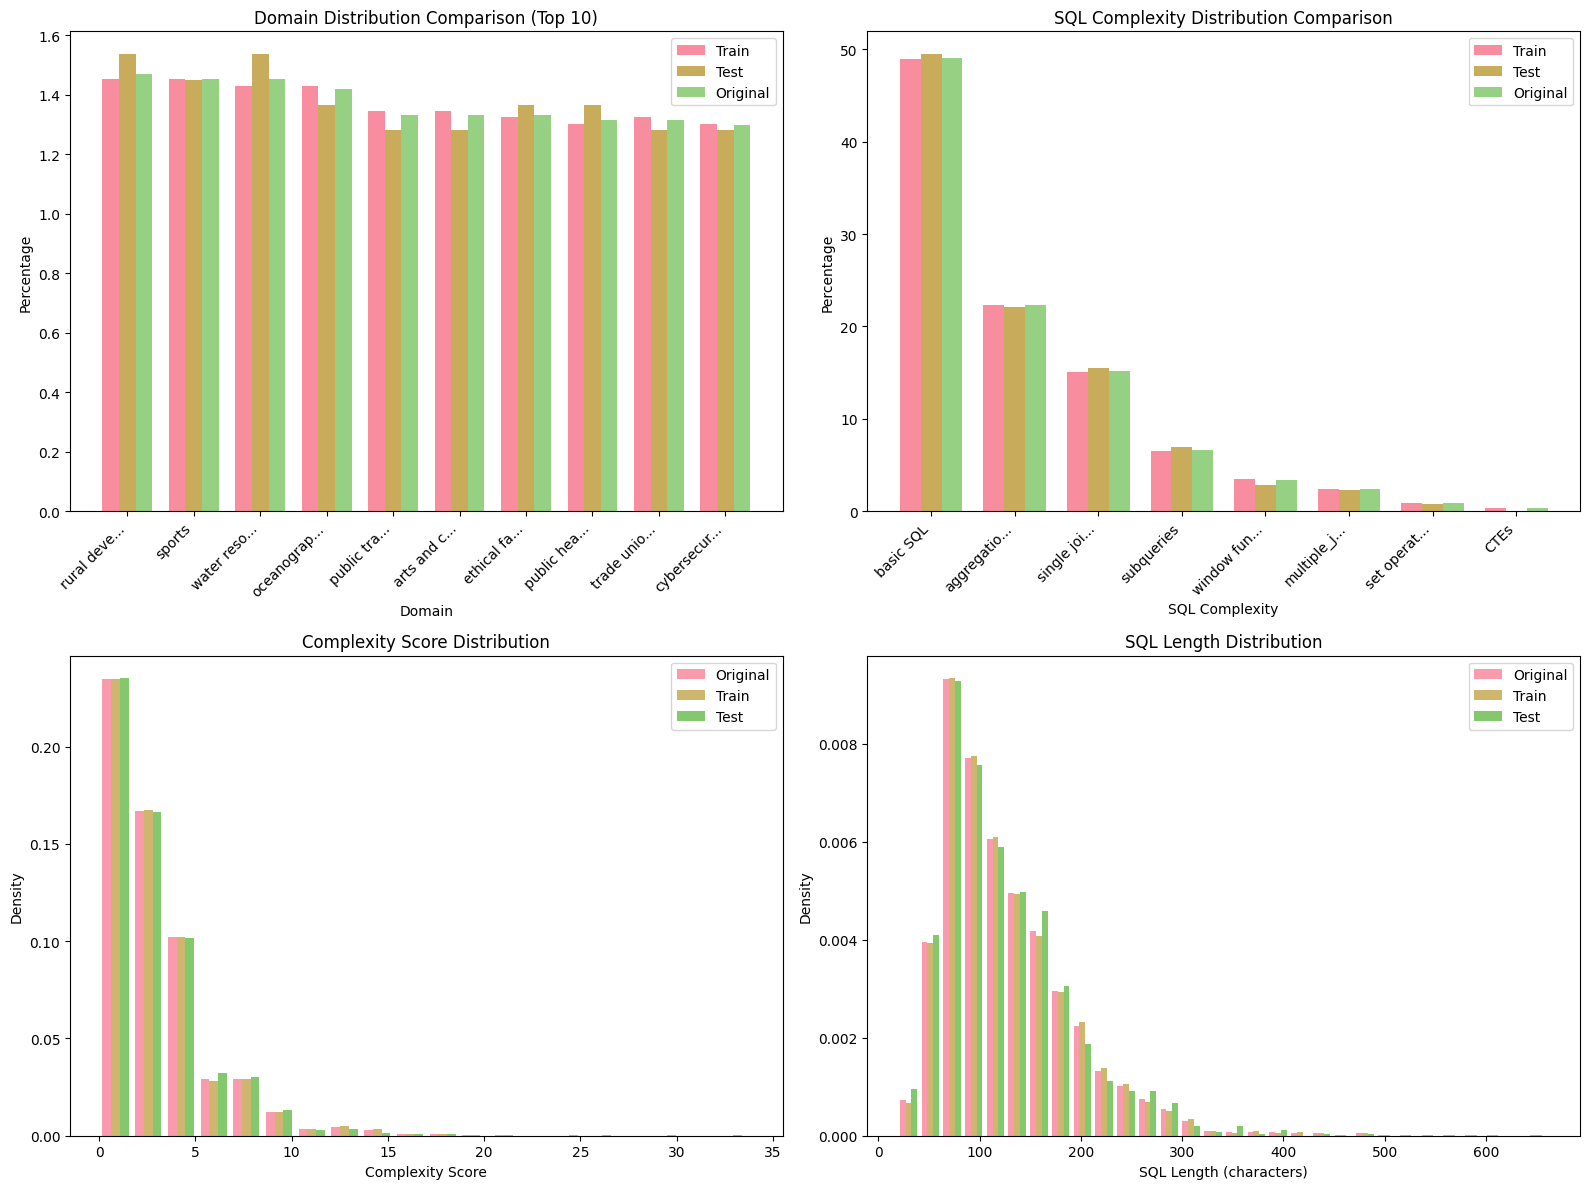

In [8]:
# Step 6: Train/Test Split Analysis and Export
if df is not None:
    print("\n📊 STEP 6: Dataset Splitting & Export Analysis")
    print("=" * 50)
    
    # Create stratified split based on domain and complexity
    print("🔀 Creating stratified train/test split...")
    
    try:
        # Create stratification key combining domain and sql_complexity
        df['stratify_key'] = df['domain'] + '_' + df['sql_complexity']
        
        # Filter out very rare combinations (less than 2 samples) for stratification
        stratify_counts = df['stratify_key'].value_counts()
        valid_stratify_keys = stratify_counts[stratify_counts >= 2].index
        df_stratifiable = df[df['stratify_key'].isin(valid_stratify_keys)].copy()
        df_non_stratifiable = df[~df['stratify_key'].isin(valid_stratify_keys)].copy()
        
        print(f"  Stratifiable samples: {len(df_stratifiable):,}")
        print(f"  Non-stratifiable samples: {len(df_non_stratifiable):,}")
        
        # Create train/test split for stratifiable data
        if len(df_stratifiable) > 0:
            train_stratified, test_stratified = train_test_split(
                df_stratifiable,
                test_size=0.2,
                random_state=42,
                stratify=df_stratifiable['stratify_key']
            )
            
            # Split non-stratifiable data randomly
            if len(df_non_stratifiable) > 0:
                train_non_strat, test_non_strat = train_test_split(
                    df_non_stratifiable,
                    test_size=0.2,
                    random_state=42
                )
                
                # Combine splits
                train_df = pd.concat([train_stratified, train_non_strat], ignore_index=True)
                test_df = pd.concat([test_stratified, test_non_strat], ignore_index=True)
            else:
                train_df = train_stratified
                test_df = test_stratified
        else:
            # Fallback to simple random split
            print("  ⚠️ Using simple random split (no stratification possible)")
            train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
        
        print(f"✅ Split created successfully!")
        print(f"  Training set: {len(train_df):,} samples ({len(train_df)/len(df)*100:.1f}%)")
        print(f"  Test set: {len(test_df):,} samples ({len(test_df)/len(df)*100:.1f}%)")
        
        # Analyze split quality
        print(f"\\n🔍 Split Quality Analysis:")
        
        # Domain distribution comparison
        print(f"\\n📊 Domain Distribution Comparison:")
        print(f"{'Domain':<20} {'Original %':<12} {'Train %':<10} {'Test %':<10} {'Diff'}")
        print("-" * 60)
        
        orig_domain_dist = df['domain'].value_counts(normalize=True) * 100
        train_domain_dist = train_df['domain'].value_counts(normalize=True) * 100
        test_domain_dist = test_df['domain'].value_counts(normalize=True) * 100
        
        for domain in orig_domain_dist.head(10).index:
            orig_pct = orig_domain_dist.get(domain, 0)
            train_pct = train_domain_dist.get(domain, 0)
            test_pct = test_domain_dist.get(domain, 0)
            diff = abs(train_pct - test_pct)
            print(f"{domain[:19]:<20} {orig_pct:<11.1f}% {train_pct:<9.1f}% {test_pct:<9.1f}% {diff:.1f}%")
        
        # Complexity distribution comparison
        print(f"\\n🎯 SQL Complexity Distribution Comparison:")
        print(f"{'Complexity':<20} {'Original %':<12} {'Train %':<10} {'Test %':<10} {'Diff'}")
        print("-" * 60)
        
        orig_complexity_dist = df['sql_complexity'].value_counts(normalize=True) * 100
        train_complexity_dist = train_df['sql_complexity'].value_counts(normalize=True) * 100
        test_complexity_dist = test_df['sql_complexity'].value_counts(normalize=True) * 100
        
        for complexity in orig_complexity_dist.index:
            orig_pct = orig_complexity_dist.get(complexity, 0)
            train_pct = train_complexity_dist.get(complexity, 0)
            test_pct = test_complexity_dist.get(complexity, 0)
            diff = abs(train_pct - test_pct)
            print(f"{complexity[:19]:<20} {orig_pct:<11.1f}% {train_pct:<9.1f}% {test_pct:<9.1f}% {diff:.1f}%")
        
        # JOIN query distribution
        print(f"\\n🔗 JOIN Query Distribution:")
        train_joins = train_df['has_join'].sum()
        test_joins = test_df['has_join'].sum()
        orig_joins = df['has_join'].sum()
        
        print(f"  Original: {orig_joins:,} JOIN queries ({orig_joins/len(df)*100:.1f}%)")
        print(f"  Training: {train_joins:,} JOIN queries ({train_joins/len(train_df)*100:.1f}%)")
        print(f"  Test: {test_joins:,} JOIN queries ({test_joins/len(test_df)*100:.1f}%)")
        
        # Complexity score statistics
        print(f"\\n📈 Complexity Score Statistics:")
        print(f"{'Split':<12} {'Mean':<8} {'Median':<8} {'Std':<8} {'Min':<6} {'Max'}")
        print("-" * 50)
        
        for split_name, split_df in [('Original', df), ('Training', train_df), ('Test', test_df)]:
            stats = split_df['complexity_score'].describe()
            print(f"{split_name:<12} {stats['mean']:<7.2f} {stats['50%']:<7.2f} {stats['std']:<7.2f} {stats['min']:<5.0f} {stats['max']:.0f}")
        
        # Visualize split distributions
        fig, axes = plt.subplots(2, 2, figsize=(16, 12))
        
        # 1. Domain distribution
        top_domains = orig_domain_dist.head(10).index
        x_pos = np.arange(len(top_domains))
        width = 0.25
        
        axes[0, 0].bar(x_pos - width, [train_domain_dist.get(d, 0) for d in top_domains], 
                      width, label='Train', alpha=0.8)
        axes[0, 0].bar(x_pos, [test_domain_dist.get(d, 0) for d in top_domains], 
                      width, label='Test', alpha=0.8)
        axes[0, 0].bar(x_pos + width, [orig_domain_dist.get(d, 0) for d in top_domains], 
                      width, label='Original', alpha=0.6)
        
        axes[0, 0].set_title('Domain Distribution Comparison (Top 10)')
        axes[0, 0].set_xlabel('Domain')
        axes[0, 0].set_ylabel('Percentage')
        axes[0, 0].set_xticks(x_pos)
        axes[0, 0].set_xticklabels([d[:10] + '...' if len(d) > 10 else d for d in top_domains], 
                                  rotation=45, ha='right')
        axes[0, 0].legend()
        
        # 2. Complexity distribution
        complexities = orig_complexity_dist.index
        x_pos = np.arange(len(complexities))
        
        axes[0, 1].bar(x_pos - width, [train_complexity_dist.get(c, 0) for c in complexities], 
                      width, label='Train', alpha=0.8)
        axes[0, 1].bar(x_pos, [test_complexity_dist.get(c, 0) for c in complexities], 
                      width, label='Test', alpha=0.8)
        axes[0, 1].bar(x_pos + width, [orig_complexity_dist.get(c, 0) for c in complexities], 
                      width, label='Original', alpha=0.6)
        
        axes[0, 1].set_title('SQL Complexity Distribution Comparison')
        axes[0, 1].set_xlabel('SQL Complexity')
        axes[0, 1].set_ylabel('Percentage')
        axes[0, 1].set_xticks(x_pos)
        axes[0, 1].set_xticklabels([c[:10] + '...' if len(c) > 10 else c for c in complexities], 
                                  rotation=45, ha='right')
        axes[0, 1].legend()
        
        # 3. Complexity score distributions
        axes[1, 0].hist([df['complexity_score'], train_df['complexity_score'], test_df['complexity_score']], 
                       bins=20, alpha=0.7, label=['Original', 'Train', 'Test'], density=True)
        axes[1, 0].set_title('Complexity Score Distribution')
        axes[1, 0].set_xlabel('Complexity Score')
        axes[1, 0].set_ylabel('Density')
        axes[1, 0].legend()
        
        # 4. SQL length distributions
        axes[1, 1].hist([df['sql_length'], train_df['sql_length'], test_df['sql_length']], 
                       bins=30, alpha=0.7, label=['Original', 'Train', 'Test'], density=True)
        axes[1, 1].set_title('SQL Length Distribution')
        axes[1, 1].set_xlabel('SQL Length (characters)')
        axes[1, 1].set_ylabel('Density')
        axes[1, 1].legend()
        
        plt.tight_layout()
        plt.show()
        
    except Exception as e:
        print(f"❌ Failed to create train/test split: {e}")
        train_df = None
        test_df = None
        
else:
    print("❌ Cannot perform split analysis - dataset not loaded")


In [9]:
# Step 7: Summary and Key Insights
if df is not None:
    print("\n🎉 STEP 7: EDA Summary & Key Insights")
    print("=" * 50)
    
    # Dataset overview
    print(f"📊 Dataset Overview:")
    print(f"  • Total records: {len(df):,}")
    print(f"  • Features: {len(df.columns)}")
    print(f"  • Memory usage: {df.memory_usage(deep=True).sum() / (1024*1024):.1f} MB")
    print(f"  • No missing values detected ✅")
    
    # Key categorical insights
    print(f"\\n🏷️ Categorical Distribution Insights:")
    print(f"  • Domains: {df['domain'].nunique()} unique domains")
    print(f"    - Most common: {df['domain'].value_counts().index[0]} ({df['domain'].value_counts().iloc[0]:,} samples)")
    print(f"    - Least common: {df['domain'].value_counts().index[-1]} ({df['domain'].value_counts().iloc[-1]:,} samples)")
    
    print(f"  • SQL Complexity: {df['sql_complexity'].nunique()} levels")
    complexity_dist = df['sql_complexity'].value_counts()
    for complexity, count in complexity_dist.items():
        percentage = (count / len(df)) * 100
        print(f"    - {complexity}: {count:,} ({percentage:.1f}%)")
    
    print(f"  • Task Types: {df['sql_task_type'].nunique()} different types")
    task_dist = df['sql_task_type'].value_counts()
    for task, count in task_dist.head(3).items():
        percentage = (count / len(df)) * 100
        print(f"    - {task}: {count:,} ({percentage:.1f}%)")
    
    # SQL complexity insights
    print(f"\\n🔗 SQL Query Complexity Insights:")
    total_with_joins = df['has_join'].sum()
    print(f"  • Queries with JOINs: {total_with_joins:,} ({total_with_joins/len(df)*100:.1f}%)")
    
    high_complexity_count = len(df[df['complexity_score'] >= 5])
    print(f"  • High complexity queries (score ≥ 5): {high_complexity_count:,} ({high_complexity_count/len(df)*100:.1f}%)")
    
    subquery_count = df['has_subquery'].sum()
    print(f"  • Queries with subqueries: {subquery_count:,} ({subquery_count/len(df)*100:.1f}%)")
    
    aggregation_count = df['has_aggregation'].sum()
    print(f"  • Queries with aggregations: {aggregation_count:,} ({aggregation_count/len(df)*100:.1f}%)")
    
    # Text length insights
    print(f"\\n📏 Text Length Insights:")
    sql_lengths = df['sql'].astype(str).str.len()
    prompt_lengths = df['sql_prompt'].astype(str).str.len()
    context_lengths = df['sql_context'].astype(str).str.len()
    
    print(f"  • SQL queries:")
    print(f"    - Average: {sql_lengths.mean():.0f} characters")
    print(f"    - Range: {sql_lengths.min()}-{sql_lengths.max()} characters")
    
    print(f"  • Prompts:")
    print(f"    - Average: {prompt_lengths.mean():.0f} characters")
    print(f"    - Range: {prompt_lengths.min()}-{prompt_lengths.max()} characters")
    
    print(f"  • Schema contexts:")
    print(f"    - Average: {context_lengths.mean():.0f} characters")
    print(f"    - Range: {context_lengths.min()}-{context_lengths.max()} characters")
    
    # Domain complexity insights
    print(f"\\n🎯 Domain Complexity Insights:")
    domain_complexity = df.groupby('domain')['complexity_score'].agg(['mean', 'count']).sort_values('mean', ascending=False)
    domain_complexity_top = domain_complexity[domain_complexity['count'] >= 50].head(5)
    
    print(f"  • Top 5 most complex domains (avg score, min 50 samples):")
    for i, (domain, stats) in enumerate(domain_complexity_top.iterrows(), 1):
        print(f"    {i}. {domain}: {stats['mean']:.2f} avg complexity ({stats['count']} samples)")
    
    # JOIN analysis insights
    if total_with_joins > 0:
        join_domains = df[df['has_join']]['domain'].value_counts().head(5)
        print(f"\\n🔗 JOIN Query Domain Distribution:")
        print(f"  • Top 5 domains with most JOIN queries:")
        for i, (domain, count) in enumerate(join_domains.items(), 1):
            total_domain = len(df[df['domain'] == domain])
            percentage = (count / total_domain) * 100
            print(f"    {i}. {domain}: {count:,} JOINs ({percentage:.1f}% of domain)")
    
    # Recommendations for model training
    print(f"\\n💡 Recommendations for Model Training:")
    print(f"  🎯 Dataset Strengths:")
    print(f"    • Large scale: {len(df):,} diverse SQL examples")
    print(f"    • Domain diversity: {df['domain'].nunique()} different domains")
    print(f"    • Complexity variety: From basic to advanced SQL patterns")
    print(f"    • Real-world relevance: Covers practical business scenarios")
    
    print(f"\\n  ⚠️ Considerations:")
    if total_with_joins / len(df) < 0.3:
        print(f"    • JOIN queries are {total_with_joins/len(df)*100:.1f}% - consider augmenting complex queries")
    
    if high_complexity_count / len(df) < 0.1:
        print(f"    • High complexity queries are {high_complexity_count/len(df)*100:.1f}% - may need specialized training")
    
    most_common_complexity = complexity_dist.index[0]
    most_common_pct = complexity_dist.iloc[0] / len(df) * 100
    if most_common_pct > 50:
        print(f"    • Dataset is {most_common_pct:.1f}% '{most_common_complexity}' - ensure balanced sampling")
    
    print(f"\\n  🚀 Training Strategy Suggestions:")
    print(f"    • Use stratified sampling by domain and complexity")
    print(f"    • Consider oversampling complex JOIN queries")
    print(f"    • Implement curriculum learning: basic → intermediate → advanced")
    print(f"    • Fine-tune on domain-specific subsets for specialized models")
    
    # Final statistics summary
    print(f"\\n📈 Final Statistics Summary:")
    print(f"  • Domain coverage: {df['domain'].nunique()} domains")
    print(f"  • Complexity levels: {df['sql_complexity'].nunique()}")
    print(f"  • Task types: {df['sql_task_type'].nunique()}")
    print(f"  • JOIN coverage: {total_with_joins:,} queries ({total_with_joins/len(df)*100:.1f}%)")
    print(f"  • High complexity: {high_complexity_count:,} queries ({high_complexity_count/len(df)*100:.1f}%)")
    print(f"  • Avg complexity score: {df['complexity_score'].mean():.2f}")
    print(f"  • Avg SQL length: {sql_lengths.mean():.0f} characters")
    
    print(f"\\n✅ EDA Complete! The dataset analysis shows a rich, diverse collection")
    print(f"   of SQL queries suitable for training text-to-SQL models. 🎉")
    
else:
    print("❌ Cannot generate summary - dataset not loaded")

print(f"\\n" + "=" * 60)
print(f"📊 HuggingFace Dataset EDA Analysis Complete!")
print(f"💡 This notebook analyzed the gretelai/synthetic_text_to_sql dataset")
print(f"🔍 Use insights to inform your SQL generation model training strategy")
print(f"=" * 60)



🎉 STEP 7: EDA Summary & Key Insights
📊 Dataset Overview:
  • Total records: 5,851
  • Features: 18
  • Memory usage: 8.7 MB
  • No missing values detected ✅
\n🏷️ Categorical Distribution Insights:
  • Domains: 100 unique domains
    - Most common: rural development (86 samples)
    - Least common: venture capital (29 samples)
  • SQL Complexity: 8 levels
    - basic SQL: 2,869 (49.0%)
    - aggregation: 1,304 (22.3%)
    - single join: 886 (15.1%)
    - subqueries: 386 (6.6%)
    - window functions: 196 (3.3%)
    - multiple_joins: 139 (2.4%)
    - set operations: 51 (0.9%)
    - CTEs: 20 (0.3%)
  • Task Types: 4 different types
    - analytics and reporting: 5,148 (88.0%)
    - data manipulation: 583 (10.0%)
    - data retrieval: 73 (1.2%)
\n🔗 SQL Query Complexity Insights:
  • Queries with JOINs: 1,118 (19.1%)
  • High complexity queries (score ≥ 5): 1,238 (21.2%)
  • Queries with subqueries: 487 (8.3%)
  • Queries with aggregations: 2,006 (34.3%)
\n📏 Text Length Insights:
  • SQL q